In [25]:
import re
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
with open('./text.txt', 'r', encoding='utf-8') as file:
    text = file.read()

text = text.replace("\n", "").replace("ъ", "ь").lower() 
text = text.replace("\n", "").replace("ё", "е").lower()   
text = re.sub(r'[^\w\s]', '', text)  
text = re.sub(r'\d+', '', text)  
text = re.sub(r'\s+', '', text).strip()  

with open('./text1.txt', 'w', encoding='utf-8') as file:
    file.write(text)

print("Очищений текст збережено в ./text1.txt")


Очищений текст збережено в ./text1.txt


In [27]:
# шифрування шифром Віженера
def vigenere_encr(text, key):
    encrypted_text = []
    key_len = len(key)
    for i, char in enumerate(text):
        if char.isalpha():
            shift = ord(key[i % key_len]) - ord('а')  
            encrypted_char = chr((ord(char) - ord('а') + shift) % 32 + ord('а'))
            encrypted_text.append(encrypted_char)
        else:
            encrypted_text.append(char)
    return ''.join(encrypted_text)


In [28]:
# Функція підрахунку індексу відповідності
def index_of_coincidence(text):
    n = len(text)
    frequencies = Counter(text)
    numerator = sum(f * (f - 1) for f in frequencies.values())
    return numerator / (n * (n - 1)) if n > 1 else 0


In [29]:
with open('./text1.txt', 'r', encoding='utf-8') as file:
    open_text = file.read()

# Ключі для шифрування
keys = ["но", "сис", "меры", "кибер", "компьютери", "системыниже", "планыаварийн",
        "нежелательные", "бизнесопераций", "требованиямонип", "доступаипредотвр",
        "сетевойактивность", "предотвратитьвозмо", "специальныеинструме", "потенциальныхцифровы"]

if not os.path.exists('cypher'):
    os.makedirs('cypher')

for key in keys:
    encrypted_text = vigenere_encr(open_text, key)
    key_length = len(key)
    file_name = f'cypher/{key_length}.txt'
    
    with open(file_name, 'w', encoding='utf-8') as f:
        f.write(encrypted_text)
    
    print(f"Зашифрований текст з ключем довжини {key_length} збережено у файл {file_name}")


Зашифрований текст з ключем довжини 2 збережено у файл cypher/2.txt
Зашифрований текст з ключем довжини 3 збережено у файл cypher/3.txt
Зашифрований текст з ключем довжини 4 збережено у файл cypher/4.txt
Зашифрований текст з ключем довжини 5 збережено у файл cypher/5.txt
Зашифрований текст з ключем довжини 10 збережено у файл cypher/10.txt
Зашифрований текст з ключем довжини 11 збережено у файл cypher/11.txt
Зашифрований текст з ключем довжини 12 збережено у файл cypher/12.txt
Зашифрований текст з ключем довжини 13 збережено у файл cypher/13.txt
Зашифрований текст з ключем довжини 14 збережено у файл cypher/14.txt
Зашифрований текст з ключем довжини 15 збережено у файл cypher/15.txt
Зашифрований текст з ключем довжини 16 збережено у файл cypher/16.txt
Зашифрований текст з ключем довжини 17 збережено у файл cypher/17.txt
Зашифрований текст з ключем довжини 18 збережено у файл cypher/18.txt
Зашифрований текст з ключем довжини 19 збережено у файл cypher/19.txt
Зашифрований текст з ключем 

In [30]:
indices = []
ic_open_text = index_of_coincidence(open_text)
print(f"Відкритий текст І = {ic_open_text}") 
# індекси відповідності для кожного зашифрованого тексту
for key in keys:
    key_length = len(key)
    file_name = f'cypher/{key_length}.txt'
    
    with open(file_name, 'r', encoding='utf-8') as f:
        encrypted_text = f.read()
    
    ic = index_of_coincidence(encrypted_text)
    indices.append((key_length, ic))
    print(f"Ключ довжини {key_length} І = {ic}")



Відкритий текст І = 0.058797345617896624
Ключ довжини 2 І = 0.04753504128038752
Ключ довжини 3 І = 0.04627167322625252
Ключ довжини 4 І = 0.034181306407665306
Ключ довжини 5 І = 0.035218839239688084
Ключ довжини 10 І = 0.03293266673758111
Ключ довжини 11 І = 0.03465752415864106
Ключ довжини 12 І = 0.03479662556356525
Ключ довжини 13 І = 0.03653130190732574
Ключ довжини 14 І = 0.03401929418310654
Ключ довжини 15 І = 0.03360035348121722
Ключ довжини 16 І = 0.03316995736951061
Ключ довжини 17 І = 0.03343179530819144
Ключ довжини 18 І = 0.03309958842349014
Ключ довжини 19 І = 0.03330742228731804
Ключ довжини 20 І = 0.03228789081357957


In [31]:
data = {
    'Довжина ключа': [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Індекс відповідності': [ic for _, ic in indices]
}

data['Довжина ключа'].insert(0, 'Відкритий текст')
data['Індекс відповідності'].insert(0, ic_open_text)

df = pd.DataFrame(data)
print(df)


      Довжина ключа  Індекс відповідності
0   Відкритий текст              0.058797
1                 2              0.047535
2                 3              0.046272
3                 4              0.034181
4                 5              0.035219
5                10              0.032933
6                11              0.034658
7                12              0.034797
8                13              0.036531
9                14              0.034019
10               15              0.033600
11               16              0.033170
12               17              0.033432
13               18              0.033100
14               19              0.033307
15               20              0.032288


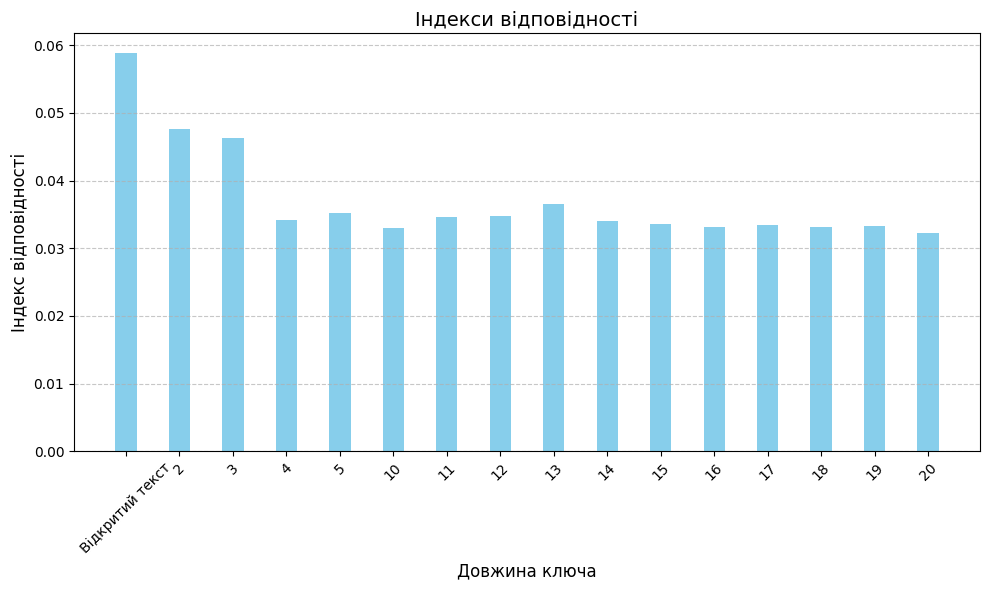

In [32]:
plt.figure(figsize=(10, 6))
bar_width = 0.4  
x = range(len(df['Довжина ключа'])) 
plt.bar(x, df['Індекс відповідності'], color='skyblue', width=bar_width)
plt.title('Індекси відповідності', fontsize=14)
plt.xlabel('Довжина ключа', fontsize=12)
plt.ylabel('Індекс відповідності', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=x, labels=df['Довжина ключа'], rotation=45)
plt.tight_layout()  
plt.show()

Розшифрування 

In [33]:
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
    text = re.sub(r'[^а-яА-Я]', '', text)  
    return text

def index_of_coincidence(text):
    n = len(text)
    frequencies = Counter(text)
    return sum((count * (count - 1) for count in frequencies.values())) / (n * (n - 1))

# Розбиття шифрованого тексту на блоки
def split_into_blocks(text, r):
    blocks = ['' for _ in range(r)]
    for i, char in enumerate(text):
        blocks[i % r] += char
    return blocks

ciphertext = read_text('v4.txt')

I_theoretical = 0.058797
coincidence_indices = []

for r in range(2, 31):
    blocks = split_into_blocks(ciphertext, r)
    ic_values = [index_of_coincidence(block) for block in blocks]
    avg_ic = sum(ic_values) / len(ic_values)  
    coincidence_indices.append((r, avg_ic))
    print(f"r={r}: I = {avg_ic}")

r=2: I = 0.032604641533356106
r=3: I = 0.03257699135676468
r=4: I = 0.032650882017613285
r=5: I = 0.032535443566457684
r=6: I = 0.03256047474074616
r=7: I = 0.03271784961796955
r=8: I = 0.03269169199663074
r=9: I = 0.032514372292478666
r=10: I = 0.03251756583831643
r=11: I = 0.03271373565919388
r=12: I = 0.032635472926334196
r=13: I = 0.05406857059071756
r=14: I = 0.03263664506099364
r=15: I = 0.032435594314224256
r=16: I = 0.03267471665611215
r=17: I = 0.03268312302293296
r=18: I = 0.0325688897981386
r=19: I = 0.03266485042748321
r=20: I = 0.03250727909722938
r=21: I = 0.032769117140656924
r=22: I = 0.03251625436491776
r=23: I = 0.03267222614924122
r=24: I = 0.032639403141123575
r=25: I = 0.03250920522617824
r=26: I = 0.05385506215325867
r=27: I = 0.03234848547129022
r=28: I = 0.03249085892814116
r=29: I = 0.032362691728960856
r=30: I = 0.03239797697809215


C:\Users\user\AppData\Local\Temp\ipykernel_16536\3648574818.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


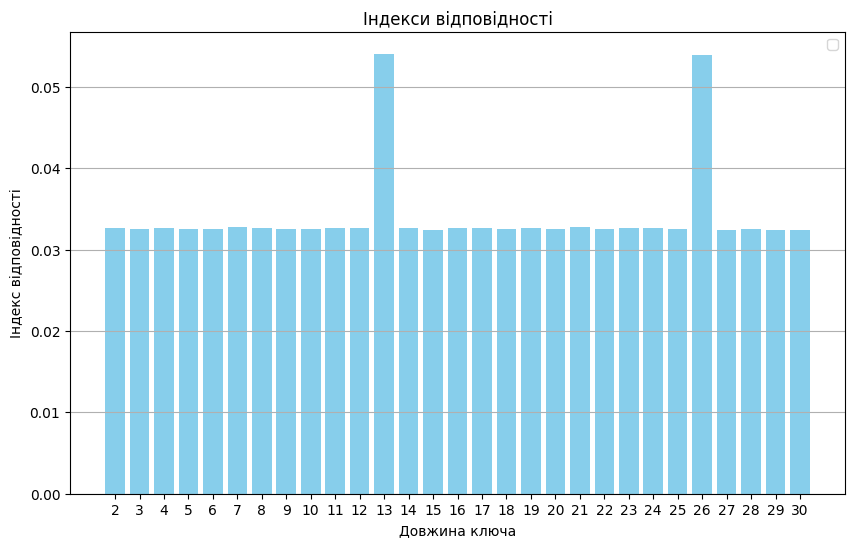

In [34]:
r_values = [r for r, _ in coincidence_indices]
ic_values = [ic for _, ic in coincidence_indices]

plt.figure(figsize=(10, 6))
plt.bar(r_values, ic_values, color='skyblue')
plt.title('Індекси відповідності')
plt.xlabel('Довжина ключа')
plt.ylabel('Індекс відповідності')
plt.legend()
plt.xticks(r_values)
plt.grid(axis='y')

plt.show()


In [35]:

def find_key(cipher_text, key_length, common_letter='о'):
    blocks = ['' for _ in range(key_length)]
    
    for i, char in enumerate(cipher_text):
        if char.isalpha(): 
            blocks[i % key_length] += char.lower()
    
    key = ''
    
    for block in blocks:
        if block:
            letter_counts = Counter(block)
            y = letter_counts.most_common(1)[0][0]
            y_index = ord(y) - ord('а')
            x_index = ord(common_letter) - ord('а')
            k = (y_index - x_index) % 32
            key_char = chr(k + ord('а'))  
            key += key_char
            print(f'Блок: {block}, Найпоширеніша буква: {y}, Зсув: {k}, Ключ: {key_char}')

    return key

cipher_text = read_text('v4.txt')
key_length = 13
vigenere_key = find_key(cipher_text, key_length)
print(f'Знайдений ключ: {vigenere_key}')


Блок: фсчнллггиюгдюууггнфмсулихвуфгшвхинпскожелнееюсммдоюувифимхгиуялгхугршяохъеьсиллясицгсдиуоппиифргспфьюцнегфмлялфсснонрцулфзгртвцоухрсумефунзтуссугжесснгселигусзлцхфлсихксисфллхулрвспехркхиуулдегкржхяиглнашипъоснлнщгслввкмуцоыклцфгсфесрсвлуиевенсседрнцроежлвммнфипвссрзхсисхдлеромбциипрфеъжпгтзронжсспгтидмещгксхевюсфрхугуэсгсгнсисфгифрснферсхсвдхилсфххгилсенснышухзюсишиуююлзгососълюсхкъиесоелйеыффгилсиурнгодсргъяропсуиеисхгосыикпцкижмвсвптихиссыхоннвьлххгипигсрльхуруолржрзжъфяевюагяпрдхгвншюоххвлолсвггппжсиыггусфглнцггфгхесмлссхрзнижгтлхрфнугхсужолтиицсфпслкссшистзуепзитоляууугюцгшунеслгхгвлиспгжссенерпгвыоиослпихихс, Найпоширеніша буква: с, Зсув: 3, Ключ: г
Блок: вышгзздъащтйзюржпшрэфярафвбыаютхэрхбмэюфчггюхыясахышсэмыыэыышхтыарщлыбхлшшшфябптъаъъшаягмабчфмрьухпшзиюрчефжятвсзюпррвшъъэпшшфзоюмюьюяюъюяжырушрвшрпфшчьшжтпхьюяцарэфваютяупыяахтлэбхыююэрутгвпаыагэхъышъювяьгэъбрпюртытфъэброрхювыиюэвпбхыбыхаияююэарюмгтбрлшязнэгвагювтээльыхюшчшррвсятвххмрхыыэхююмарсъшагвгияряээхюяхъшэрюсъхбфь

In [36]:
def vigenere_decrypt(cipher_text, key):
    decrypted_text = []
    key_length = len(key)

    j = 0  
    for char in cipher_text:
        if char.isalpha():  
            char_index = ord(char.lower()) - ord('а') 
            key_index = ord(key[j % key_length].lower()) - ord('а')  
            decrypted_index = (char_index - key_index) % 32
            decrypted_char = chr(decrypted_index + ord('а'))

            if char.isupper():
                decrypted_char = decrypted_char.upper()

            decrypted_text.append(decrypted_char)
            j += 1  
        else:
            decrypted_text.append(char)  

    return ''.join(decrypted_text)

def save_to_file(filename, text):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(text)


cipher_text = read_text('v4.txt')  
key = "громыковедьма"  
decrypted_text = vigenere_decrypt(cipher_text, key)
output_filename = 'decrypt_v4.txt'
save_to_file(output_filename, decrypted_text)
print(f'Розшифрований текст збережено у файл: {output_filename}')


Розшифрований текст збережено у файл: decrypt_v4.txt
